In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import MultiPolygon
from tqdm import tqdm
import gdown
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected= True)
import plotly.express as px

# import base ???

In [7]:
base = pd.read_csv("INSEE_DATA_TREATED.csv", delimiter=",")

/tmp/ipykernel_9521/3172684118.py:1: DtypeWarning:

Columns (1,2,4,25,32,33) have mixed types. Specify dtype option on import or set low_memory=False.



In [8]:
base.columns

Index(['Unnamed: 0', 'A6', 'A17', 'A38', 'CPFD', 'DATDEB', 'DATFIN', 'DEPR',
       'DEPT', 'DOMEMPL', 'DOMEMPL_EM', 'DUREE', 'FILT', 'REGR', 'REGT',
       'SEXE', 'PCS', 'TYP_EMPLOI', 'CONV_COLL', 'NBHEUR', 'NBHEUR_TOT', 'AGE',
       'TRNNETO', 'TRALCHT', 'TREFF', 'CONT_TRAV', 'CS', 'AGE_TR', 'DATDEB_TR',
       'DATFIN_TR', 'DUREE_TR', 'POND', 'DOMEMPL_EM_N', 'DOMEMPL_N', 'REGR_N',
       'REGT_N', 'CS_N'],
      dtype='object')

In [ ]:
numerical_columns = [
    'DATDEB', 'DATFIN', #date début et fin de rémunération par rapport au 01/01
     'AGE', #age en années
     'POND', #pondération 1/12e
    'DUREE', #durée de paie en jours
      'NBHEUR', 'NBHEUR_TOT', #nombre d'heures salariées total (quelle diff?)
]
categorical_columns = [
    'A6', 'A17', 'A38' #activité en nomenclature agrégrée
    'CPFD', #temps complet ou partiel
    'DEPR', 'DEPT', #département résidence et travail
    'DOMEMPL', 'DOMEMPL_EM', #domaine de l'emploi et l'établissement d'affectation/employeur
    
    'FILT', #indic poste annexe 2 ou non-annexe 1 (seuils rémunération volume)
    'REGR', 'REGT', #région de résidence et de travail
    'SEXE', #1 homme 2 femme
    'PCS', #PCS-ESE
    'TYP_EMPLOI', #ordinaire, apprenti, autre
    'CONV_COLL', #convention collective
  
    'TRNNETO', #rémunération nette globale en tranches -> à passer en numérique ?
    'TRALCHT', #total des indémnités de chômage, en tranches -> passage en numérique ?
    'TREFF', #tranche d'effectif : de 0 à 250+ postes
    'CONT_TRAV', #contrat de travail : APP apprentissage, TOA occasionnel ou à l'acte, TTP intérim, AUTre
    'CS', #CSP mais code plus simple 
    'AGE_TR', #age en tranches quadriennales
    'DATDEB_TR',
       'DATFIN_TR', #dates début et fin rémunération en tranches
    'DUREE_TR', #durée de paie exprimée en jours en tranches mensuelles
    'DOMEMPL_EM_N', 'DOMEMPL_N', 'REGR_N',
       'REGT_N', 'CS_N' #modified categorical variables with explicit names
]

### Exploratory data analysis: descriptive analysis

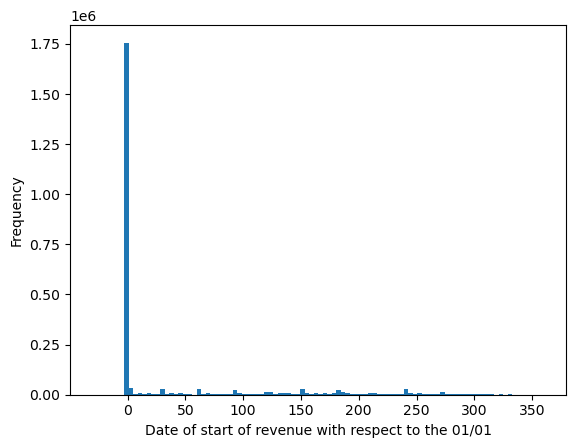

In [9]:
fig, ax = plt.subplots()
ax.hist(base['DATDEB'], bins=100, cumulative=False)
ax.set_xlabel('Date of start of revenue with respect to the 01/01')
ax.set_ylabel('Frequency')
plt.show()

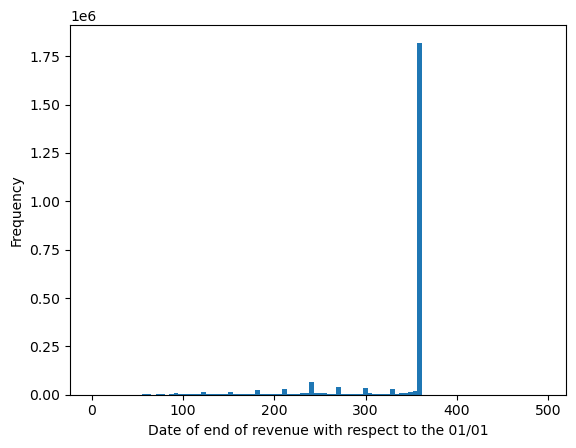

In [10]:
fig, ax = plt.subplots()
ax.hist(base['DATFIN'], bins=100, cumulative=False)
ax.set_xlabel('Date of end of revenue with respect to the 01/01')
ax.set_ylabel('Frequency')
plt.show()

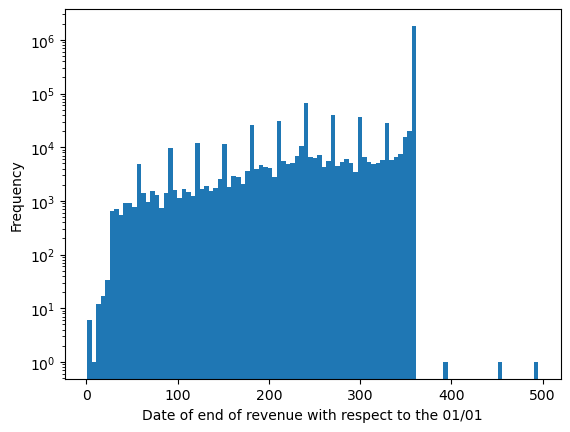

In [11]:
fig, ax = plt.subplots()
ax.hist(base['DATFIN'], bins=100, cumulative=False, log=True)
ax.set_xlabel('Date of end of revenue with respect to the 01/01')
ax.set_ylabel('Frequency')
plt.show()

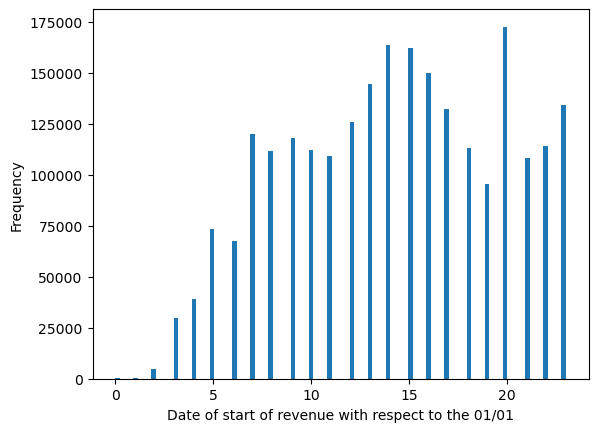

In [12]:
fig, ax = plt.subplots()
ax.hist(base['TRNNETO'], bins=100, cumulative=False)
ax.set_xlabel('Date of start of revenue with respect to the 01/01')
ax.set_ylabel('Frequency')
plt.show()

In [13]:
base['TRNNETO'].value_counts()

TRNNETO
20    172700
14    163694
15    162269
16    149751
13    144555
23    134496
17    132108
12    125933
7     120161
9     118031
22    114143
18    113143
10    111997
8     111967
11    109501
21    108381
19     95396
5      73460
6      67358
4      39083
3      30022
2       4794
1        592
0        240
Name: count, dtype: int64

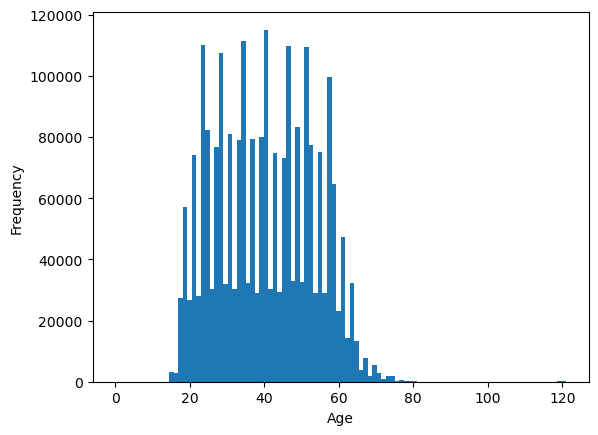

In [14]:
fig, ax = plt.subplots()
ax.hist(base['AGE'], bins=100, cumulative=False)
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.show()

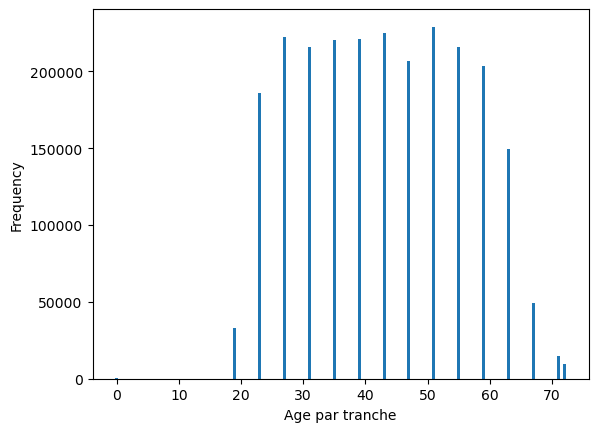

In [15]:
categories = base['AGE_TR'].value_counts().index
counts = base['AGE_TR'].value_counts().values
fig, ax = plt.subplots()
ax.bar(categories, counts, width=0.5)
ax.set_xlabel("Age par tranche")
ax.set_ylabel('Frequency')
plt.show()

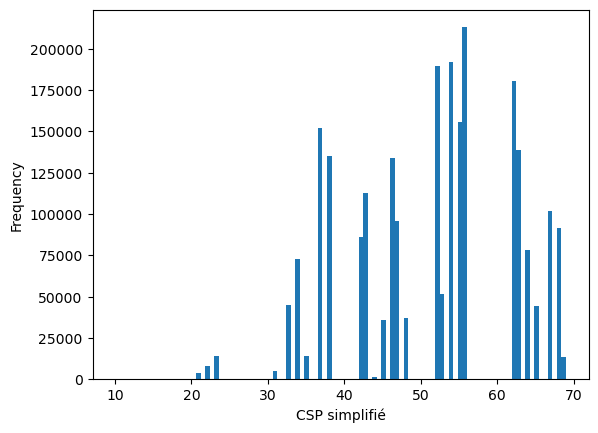

In [16]:
fig, ax = plt.subplots()
ax.hist(base['CS'], bins=100, cumulative=False)
ax.set_xlabel('CSP simplifié')
ax.set_ylabel('Frequency')
plt.show()

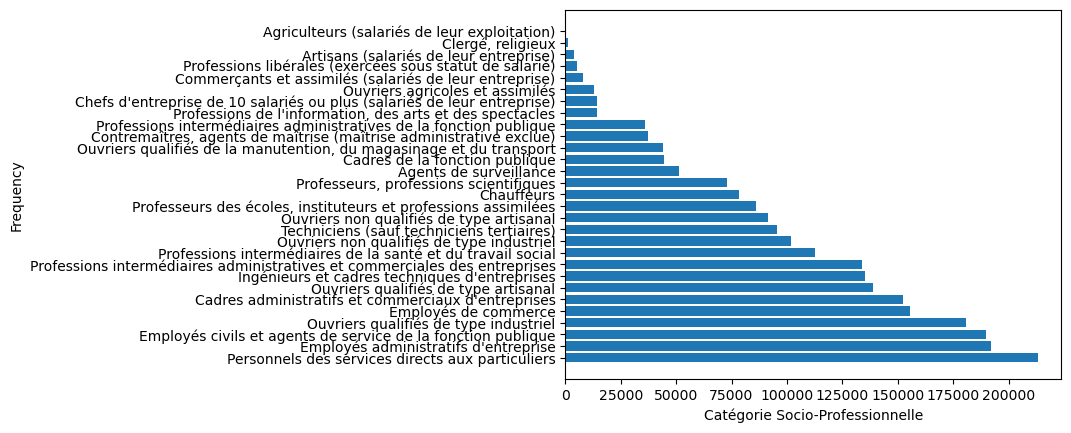

In [17]:
categories = base['CS_N'].value_counts().index
counts = base['CS_N'].value_counts().values
fig, ax = plt.subplots()
ax.barh(categories, counts)
ax.set_xlabel("Catégorie Socio-Professionnelle")
ax.set_ylabel('Frequency')
plt.show()

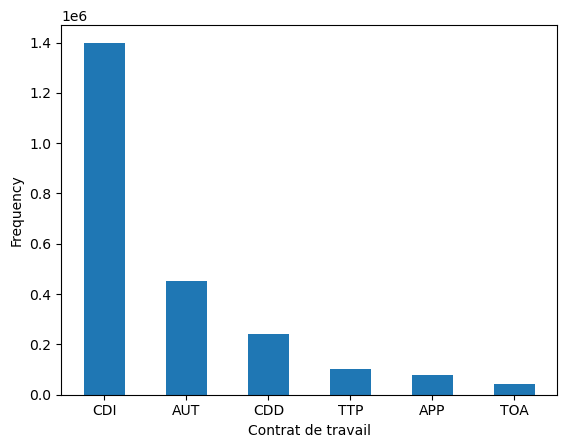

In [18]:
categories = base['CONT_TRAV'].value_counts().index
counts = base['CONT_TRAV'].value_counts().values
fig, ax = plt.subplots()
ax.bar(categories, counts, width=0.5)
ax.set_xlabel('Contrat de travail')
ax.set_ylabel('Frequency')
plt.show()

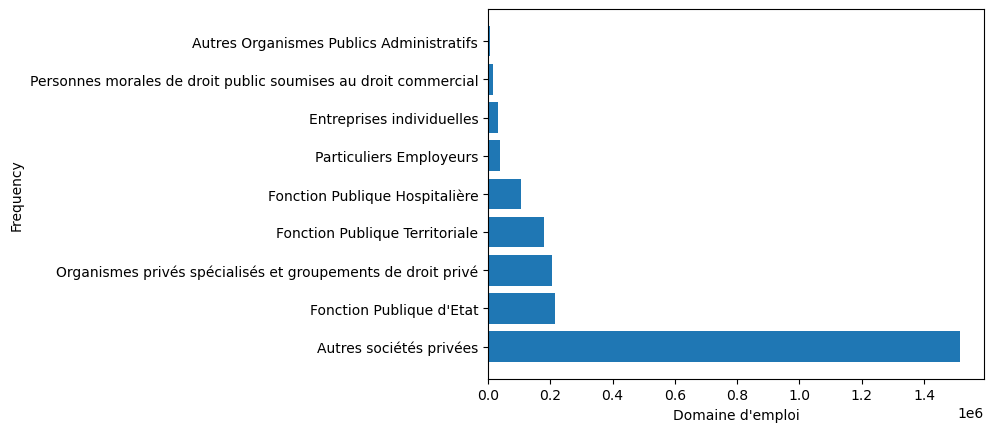

In [19]:
categories = base['DOMEMPL_EM_N'].value_counts().index
counts = base['DOMEMPL_EM_N'].value_counts().values
fig, ax = plt.subplots()
ax.barh(categories, counts)
ax.set_xlabel("Domaine d'emploi")
ax.set_ylabel('Frequency')
plt.show()

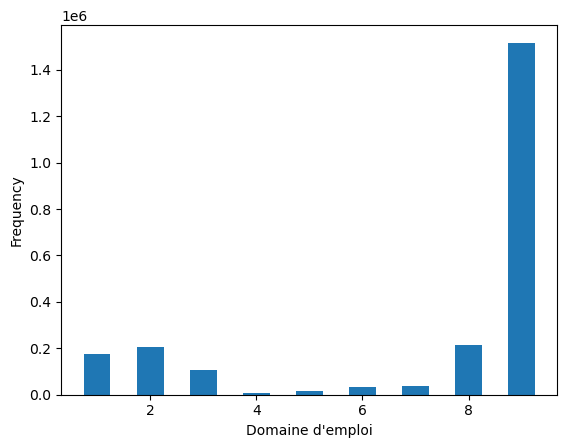

In [20]:
categories = base['DOMEMPL'].value_counts().index
counts = base['DOMEMPL'].value_counts().values
fig, ax = plt.subplots()
ax.bar(categories, counts, width=0.5)
ax.set_xlabel("Domaine d'emploi")
ax.set_ylabel('Frequency')
plt.show()

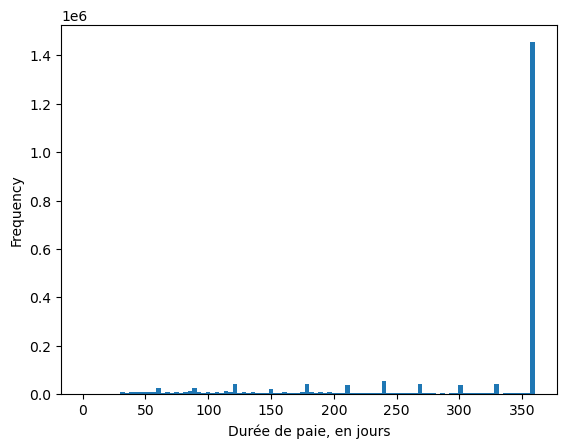

In [21]:
fig, ax = plt.subplots()
ax.hist(base['DUREE'], bins=100, cumulative=False)
ax.set_xlabel('Durée de paie, en jours')
ax.set_ylabel('Frequency')
plt.show()

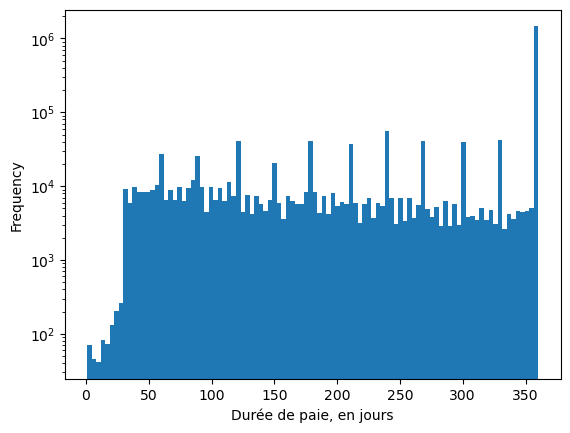

In [22]:
fig, ax = plt.subplots()
ax.hist(base['DUREE'], bins=100, cumulative=False, log=True)
ax.set_xlabel('Durée de paie, en jours')
ax.set_ylabel('Frequency')
plt.show()

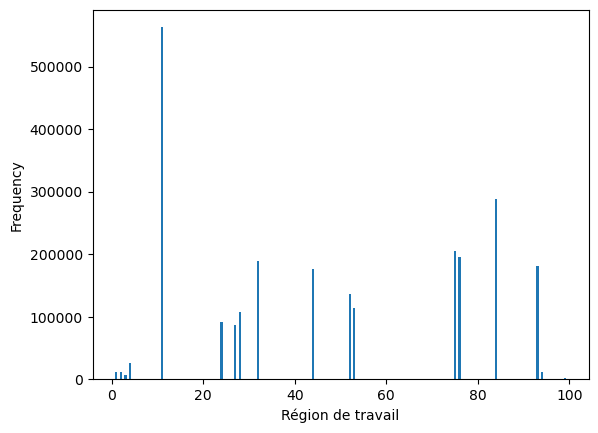

In [23]:
categories = base['REGT'].value_counts().index
counts = base['REGT'].value_counts().values
fig, ax = plt.subplots()
ax.bar(categories, counts, width=0.5)
ax.set_xlabel("Région de travail")
ax.set_ylabel('Frequency')
plt.show()

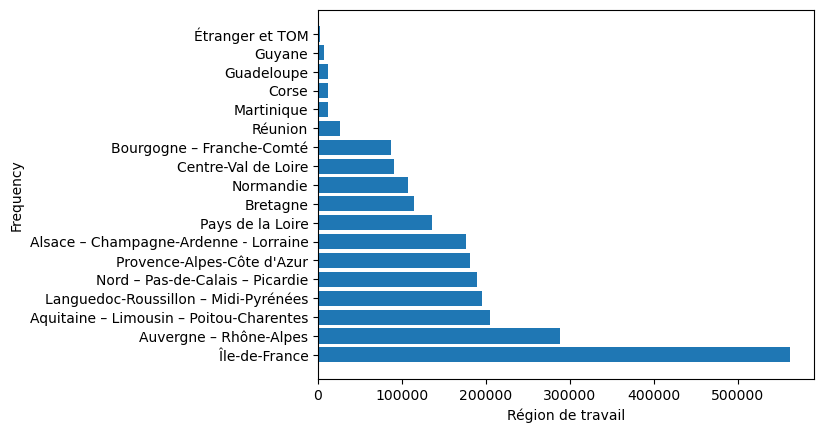

In [24]:
categories = base['REGT_N'].value_counts().index
counts = base['REGT_N'].value_counts().values
fig, ax = plt.subplots()
ax.barh(categories, counts)
ax.set_xlabel("Région de travail")
ax.set_ylabel('Frequency')
plt.show()

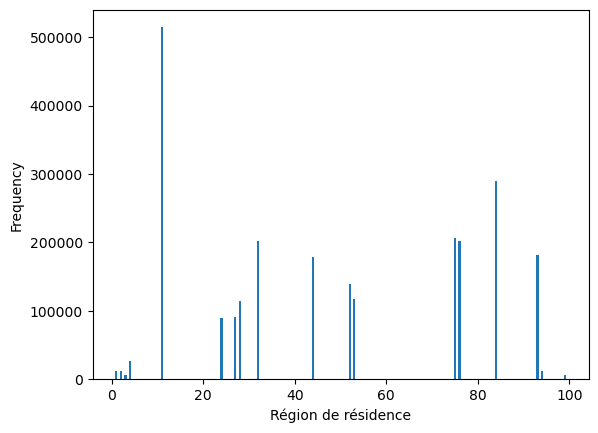

In [25]:
categories = base['REGR'].value_counts().index
counts = base['REGR'].value_counts().values
fig, ax = plt.subplots()
ax.bar(categories, counts, width=0.5)
ax.set_xlabel("Région de résidence")
ax.set_ylabel('Frequency')
plt.show()

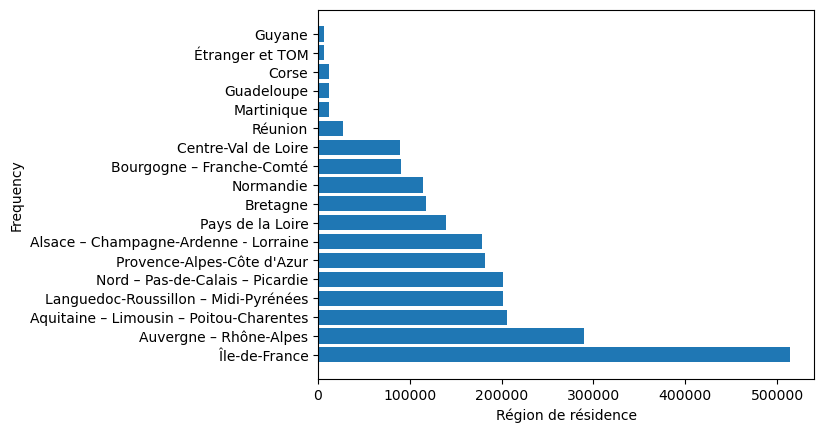

In [27]:
categories = base['REGR_N'].value_counts().index
counts = base['REGR_N'].value_counts().values
fig, ax = plt.subplots()
ax.barh(categories, counts)
ax.set_xlabel("Région de résidence")
ax.set_ylabel('Frequency')
plt.show()

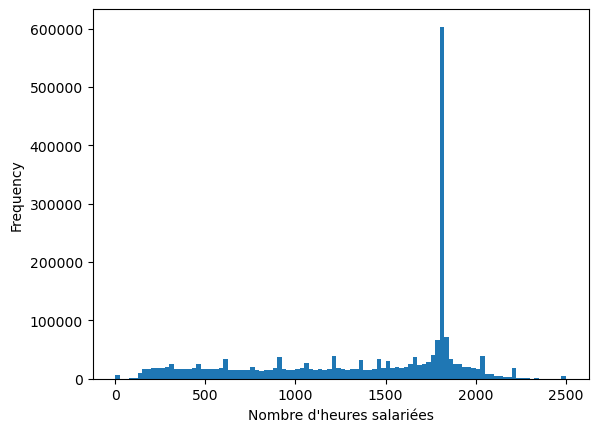

In [28]:
fig, ax = plt.subplots()
ax.hist(base['NBHEUR'], bins=100, cumulative=False)
ax.set_xlabel("Nombre d'heures salariées")
ax.set_ylabel('Frequency')
plt.show()

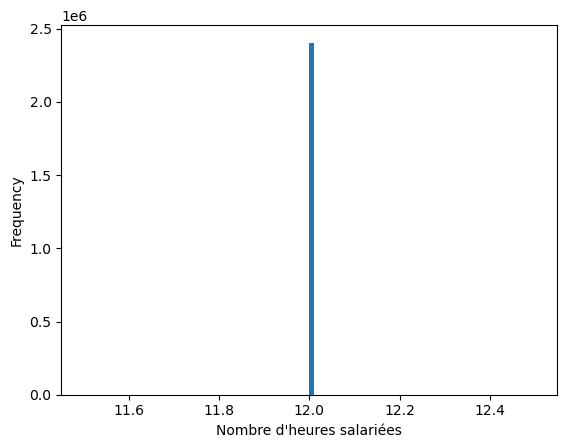

In [29]:
fig, ax = plt.subplots()
ax.hist(base['POND'], bins=100, cumulative=False)
ax.set_xlabel("Nombre d'heures salariées")
ax.set_ylabel('Frequency')
plt.show()